In [1]:
import pandas as pd
import os

In [2]:
def aggregate_followers():
    all_followers = []
    base_dir = "output"
    for handle in os.listdir(base_dir):
        file_path = os.path.join(base_dir, handle, "cumulative_follows.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None, names=["follower"])
            all_followers.append(df)
    return pd.concat(all_followers)

In [3]:
all_followers_df = aggregate_followers()

In [4]:
def rank_accounts(df):
    df['follower'] = df['follower'].str.lower()
    rank_df = df['follower'].value_counts().reset_index()
    rank_df.columns = ['account', 'follower_count']
    rank_df.sort_values(by='follower_count', ascending=False, inplace=True)
    return rank_df

In [5]:
ranked_accounts = rank_accounts(all_followers_df)
print(ranked_accounts)

         account  follower_count
0       coinbase              49
1      consensys              42
2     eigenlayer              34
3       paradigm              32
4       ethereum              31
...          ...             ...
3619   cryptunez               1
3618      kensho               1
3617  idfeidiotm               1
3616      0xtuba               1
7214     dcposch               1

[7215 rows x 2 columns]


In [6]:
def consolidate_new_follows():
    new_follows = []
    base_dir = "output"
    for handle in os.listdir(base_dir):
        file_path = os.path.join(base_dir, handle, "incremental_updates.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None, names=["timestamp", "new_follower"])
            df["followed_by"] = handle
            new_follows.append(df)
    return pd.concat(new_follows)

In [7]:
new_follows_df = consolidate_new_follows()

In [8]:
def display_new_follows(df):
    sorted_df = df.sort_values(by="timestamp", ascending=False)
    return sorted_df

In [9]:
sorted_new_follows = display_new_follows(new_follows_df)
print(sorted_new_follows)

               timestamp    new_follower   followed_by
236  2024-05-03 17:20:24   hashrateindex  VinnyLingham
256  2024-05-03 17:20:24      TwM4Q7UNGp  VinnyLingham
262  2024-05-03 17:20:24      BomORktp7R  VinnyLingham
261  2024-05-03 17:20:24          l1fxyz  VinnyLingham
260  2024-05-03 17:20:24        rodarmor  VinnyLingham
..                   ...             ...           ...
72   2024-04-05 20:18:08       blknoiz06        0xjim_
73   2024-04-05 20:18:08        sassal0x        0xjim_
74   2024-04-05 20:18:08     SportsOnMax        0xjim_
75   2024-04-05 20:18:08  BleacherReport        0xjim_
25   2024-04-05 20:18:08        orb_land        0xjim_

[34611 rows x 3 columns]


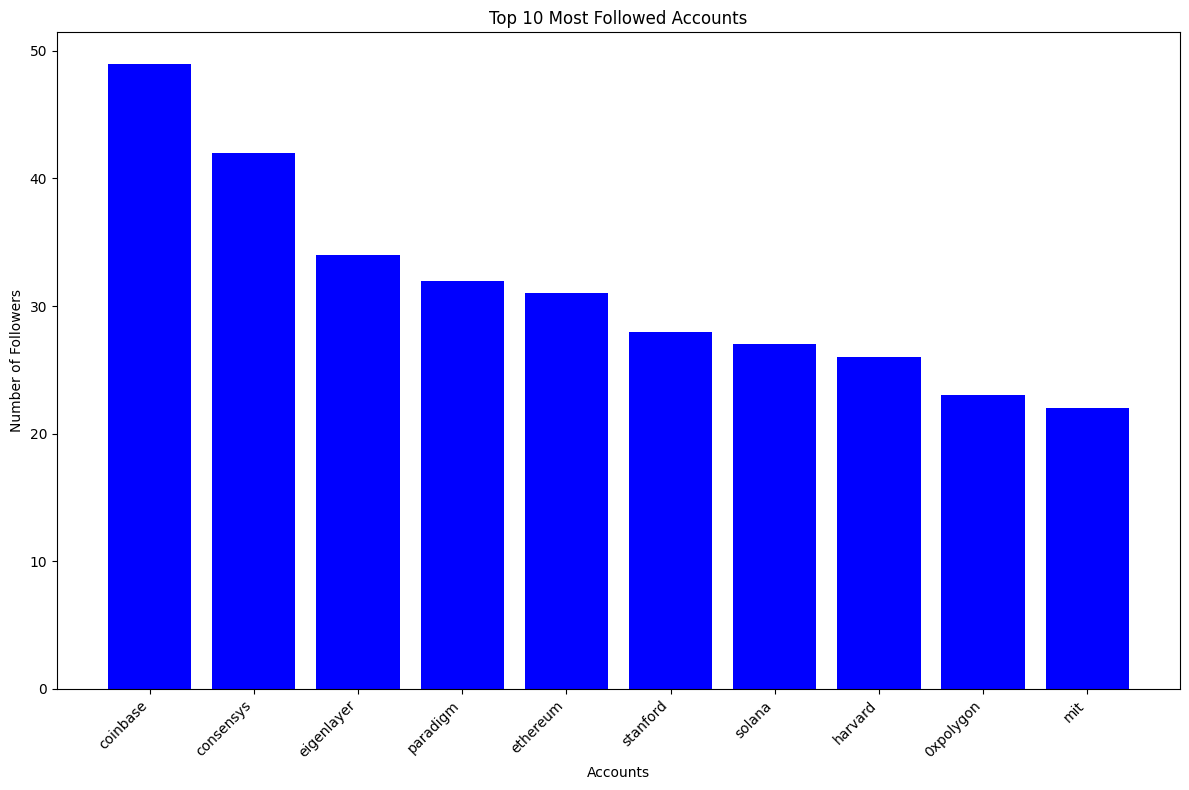

In [10]:
import matplotlib.pyplot as plt

def plot_most_followed_accounts(df, top_n=10):
    # Assuming 'df' has columns 'account' and 'follower_count'
    top_accounts = df.head(top_n)
    plt.figure(figsize=(12, 8))
    plt.bar(top_accounts['account'], top_accounts['follower_count'], color='blue')
    plt.xlabel('Accounts')
    plt.ylabel('Number of Followers')
    plt.title('Top {} Most Followed Accounts'.format(top_n))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the most followed accounts
plot_most_followed_accounts(ranked_accounts)


In [11]:
from datetime import datetime, timedelta

New followers in the past day: 4798
New followers in the past week: 4798
New followers in the past month: 34611
